In [114]:
from __future__ import division

import os
import matplotlib.pyplot as plt
import numpy as np
import skbio
import scipy.stats
import statsmodels.api as sms
import statsmodels.formula.api as smf

import absloute_power.traditional as trad
import absloute_power.utils as ap


import pandas as pd
import biom

from skbio.stats.power import subsample_power

from absloute_power.traditional import calc_ttest_1

In [115]:
import pickle

In [116]:
base_dir = '/Users/jwdebelius/Repositories/Absloute-Power'
data_dir = os.path.join(base_dir, 'data/HMP')
map_fp = os.path.join(data_dir, 'HMPv35_100nt_even1k.txt')
otu_fp = os.path.join(data_dir, 'HMPv35_100nt_even1k.biom')
uud_fp = os.path.join(data_dir, '1k/unweighted_unifrac_dm.txt')

In [117]:
map_ = pd.read_csv(map_fp, sep='\t', dtype=str)
map_.set_index('#SampleID', inplace=True)
uud = skbio.DistanceMatrix.read(uud_fp)

In [5]:
map_.columns

Index([u'BarcodeSequence', u'LinkerPrimerSequence', u'TITLE',
       u'EXPERIMENTACCESSION', u'sex', u'ANONYMIZEDNAME', u'pfph',
       u'HMPbodysubsite', u'HMPbodysupersite', u'intph', u'sampcollectdevice',
       u'EXPERIMENTCENTER', u'envmatter', u'PLATFORM', u'hostsubjectid',
       u'bodysite', u'psn', u'bmi', u'visitno', u'AGE', u'RUNALIAS',
       u'RUNCENTER', u'gender', u'REGION', u'srs', u'Runid', u'collectday',
       u'Description', u'COUNTRY'],
      dtype='object')

In [40]:
def test_beta_permanova(ids, meta, dm, cat, num_iter=499):
    """Tests difference in beta diversity for a category and distance matrix"""
    # Gets the map and distance matrix subset
    all_ids = np.hstack(ids)
    # Calculates the permanova
    perma_results = skbio.stats.distance.permanova(dm.filter(all_ids), 
                                                   meta.loc[all_ids],
                                                   cat,
                                                   num_iter)
    # Returns the p value
    return perma_results['p-value']

In [8]:
map_.groupby('HMPbodysupersite').count().max(1)

HMPbodysupersite
Airways                    286
Gastrointestinal_tract     318
Oral                      2994
Skin                       800
Urogenital_tract           447
dtype: int64

In [9]:
map_.groupby('PLATFORM').count().max(1)

PLATFORM
FLX          729
Titanium    3707
no_data      409
dtype: int64

In [10]:
inter_ids = list(set(map_.index).intersection(set(uud.ids)))

In [38]:
site_test = lambda x: test_beta_permanova(x, map_, uud, 'HMPbodysupersite')

In [13]:
site_ids = [ids for ids in map_.loc[inter_ids].groupby('HMPbodysupersite').groups.itervalues()]
# nat_ids = [ids for ids in map_.loc[inter_ids].groupby('COUNTRY').groups.itervalues()]

In [39]:
site_test(site_ids)

0.001

In [ ]:
site_power2, site_counts2 = subsample_power(site_test, site_ids, min_counts=3, max_counts=15, counts_interval=1, num_runs=5)
# nat_power, nat_counts = subsample_power(nat_test, nat_ids, min_counts=10, max_counts=100, counts_interval=10)

### ids

In [43]:
with open(os.path.join(data_dir, 'power_005.p'), 'wb') as f_:
    pickle.dump([site_power, site_counts], f_)

In [120]:
with open('/Users/jwdebelius/Repositories/Absloute-Power/data/yatsunenko/power.p', 'rb') as f_:
    [age_power, age_counts, nat_power, nat_counts] = pickle.load(f_)
with open('/Users/jwdebelius/Repositories/Absloute-Power/data/merged_otu_table_and_mapping_bmi/obese.p', 'rb') as f_:
    [bmistudy_power, bmistudy_counts, obese_power, obese_counts] = pickle.load(f_)
with open('/Users/jwdebelius/Repositories/Absloute-Power/data/otu_table_and_mapping_ibd/ibd.p', 'rb') as f_:
    [ibdstudy_power, ibdstudy_counts, ibd_power, ibd_counts] = pickle.load(f_)

In [116]:
child_eff = ap.z_effect(child_counts[1:], child_power[:, 1:]).mean()
child_sem = ap.z_effect(child_counts[1:], child_power[:, 1:]).std() / np.sqrt(np.prod(child_power[:, :5].shape))

In [119]:
site_counts, site_power

(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([[ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ],
        [ 0.998,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ],
        [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ],
        [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ],
        [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
          1.   ,  1.   ,  1.   ,  1.   ]]))

In [121]:
bmistudy_power

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

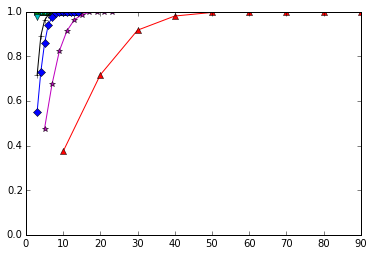

In [113]:
%matplotlib inline
ax = plt.axes()
ax.plot(site_counts, site_power.mean(0), 'bs') #, mfc='none', mec='b')
ax.set_ylim([0, 1])
ax.plot(bmistudy_counts, bmistudy_power.mean(0), 'go') #, mfc='none', mec='g')
ax.plot(obese_counts, obese_power.mean(0), 'r^-') #, mfc='none', mec='r')
ax.plot(ibdstudy_counts, ibdstudy_power.mean(0), 'cv')
ax.plot(ibd_counts, ibd_power.mean(0), 'm*-')
ax.plot(age_counts, age_power.mean(0), 'k+-')
ax.plot(nat_counts, nat_power.mean(0), 'bD-')
# plt.plot(child_counts, child_power.mean(0), 'go-')
# plt.plot(np.arange(1, 15, 0.5), ap.z_power(np.arange(1, 15, 0.5), baby_eff))
# plt.fill_between(np.arange(1, 15, 0.5), 
#                  ap.z_power(np.arange(1, 15, 0.5), baby_eff - baby_sem),
#                  ap.z_power(np.arange(1, 15, 0.5), baby_eff + baby_sem))

In [127]:
obese_eff = ap.z_effect(obese_counts, obese_power)
ibd_eff = ap.z_effect(ibd_counts, ibd_power)

studi_eff = ap.z_effect(ibdstudy_counts, ibdstudy_power)
studb_eff = ap.z_effect(bmistudy_counts, bmistudy_power)

age_eff = ap.z_effect(age_counts, age_power)
nat_eff = ap.z_effect(nat_counts, nat_power)

site_eff = ap.z_effect(nat_counts, nat_power, alpha=0.005)


In [84]:
print obese_eff.mean(),  obese_eff.std() / np.sqrt(np.prod(obese_eff.shape)) * scipy.stats.t.ppf(0.975, np.prod(obese_eff.shape))

0.844191230554 0.0209079638509


In [85]:
print studi_eff.mean(), studi_eff.std() / np.sqrt(np.prod(studi_eff.shape)) * scipy.stats.t.ppf(0.975, np.prod(studi_eff.shape))

3.27904081168 0.0636433978854


In [90]:
print ibd_eff.mean(), ibd_eff.std()/ np.sqrt(np.prod(ibd_eff.shape)) * scipy.stats.t.ppf(0.975, np.prod(ibd_eff.shape))

1.41583813772 0.0302688496766


In [95]:
print 'age', age_eff.mean(), age_eff.std()/ np.sqrt(np.prod(age_eff.shape)) * scipy.stats.t.ppf(0.975, np.prod(age_eff.shape))
print 'nat', nat_eff.mean(), nat_eff.std()/ np.sqrt(np.prod(nat_eff.shape)) * scipy.stats.t.ppf(0.975, np.prod(nat_eff.shape))

age 2.29693488483 0.0436548019739
nat 2.00698257718 0.0466448625456


In [128]:
site_eff.mean(), site_eff.std() / np.sqrt(np.prod(site_eff.shape)) * scipy.stats.t.ppf(0.975, np.prod(site_eff.shape))

(2.5193990473039296, 0.025757931285087729)

In [111]:
print np.round(2.5193990473039296 - 0.025757931285087729, 2)
print np.round(2.5193990473039296 + 0.025757931285087729, 2)

2.49
2.55


In [126]:
site_power

array([[ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ],
       [ 0.998,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ],
       [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ],
       [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ],
       [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ]])

In [123]:
print studb_eff.mean(), studb_eff.std() / np.sqrt(np.prod(studb_eff.shape)) * scipy.stats.t.ppf(0.975, np.prod(studi_eff.shape))

nan nan


In [71]:
bmistudy_counts, bmistudy_power

(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]]))

In [125]:
print ap.z_effect([3], [0.999])
print ap.z_effect([3], [0.999]) / 2

[ 4.123468]
[ 2.061734]


In [129]:
ap.z_power(np.arange(1.5, 13, 1.5), 4.123468)

array([ 0.94641714,  0.999     ,  0.99998807,  0.99999989,  1.        ,
        1.        ,  1.        ,  1.        ])

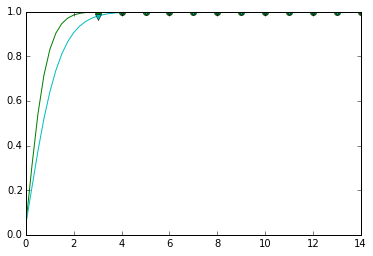

In [141]:
plt.plot(np.arange(0, 13, 0.25), ap.z_power(np.arange(0, 13, 0.25), 4.123468), 'g-')
plt.plot(bmistudy_counts, bmistudy_power.mean(0), 'go')
plt.plot(np.arange(0, 13, 0.25), ap.z_power(np.arange(0, 13, 0.25), 3.27904081168), 'c-')
plt.plot(ibdstudy_counts, ibdstudy_power.mean(0), 'cv')